## Assignment 2
## EP20BTECH11007

In [316]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import chi2
import seaborn as sns
sns.set_theme()


## Q1

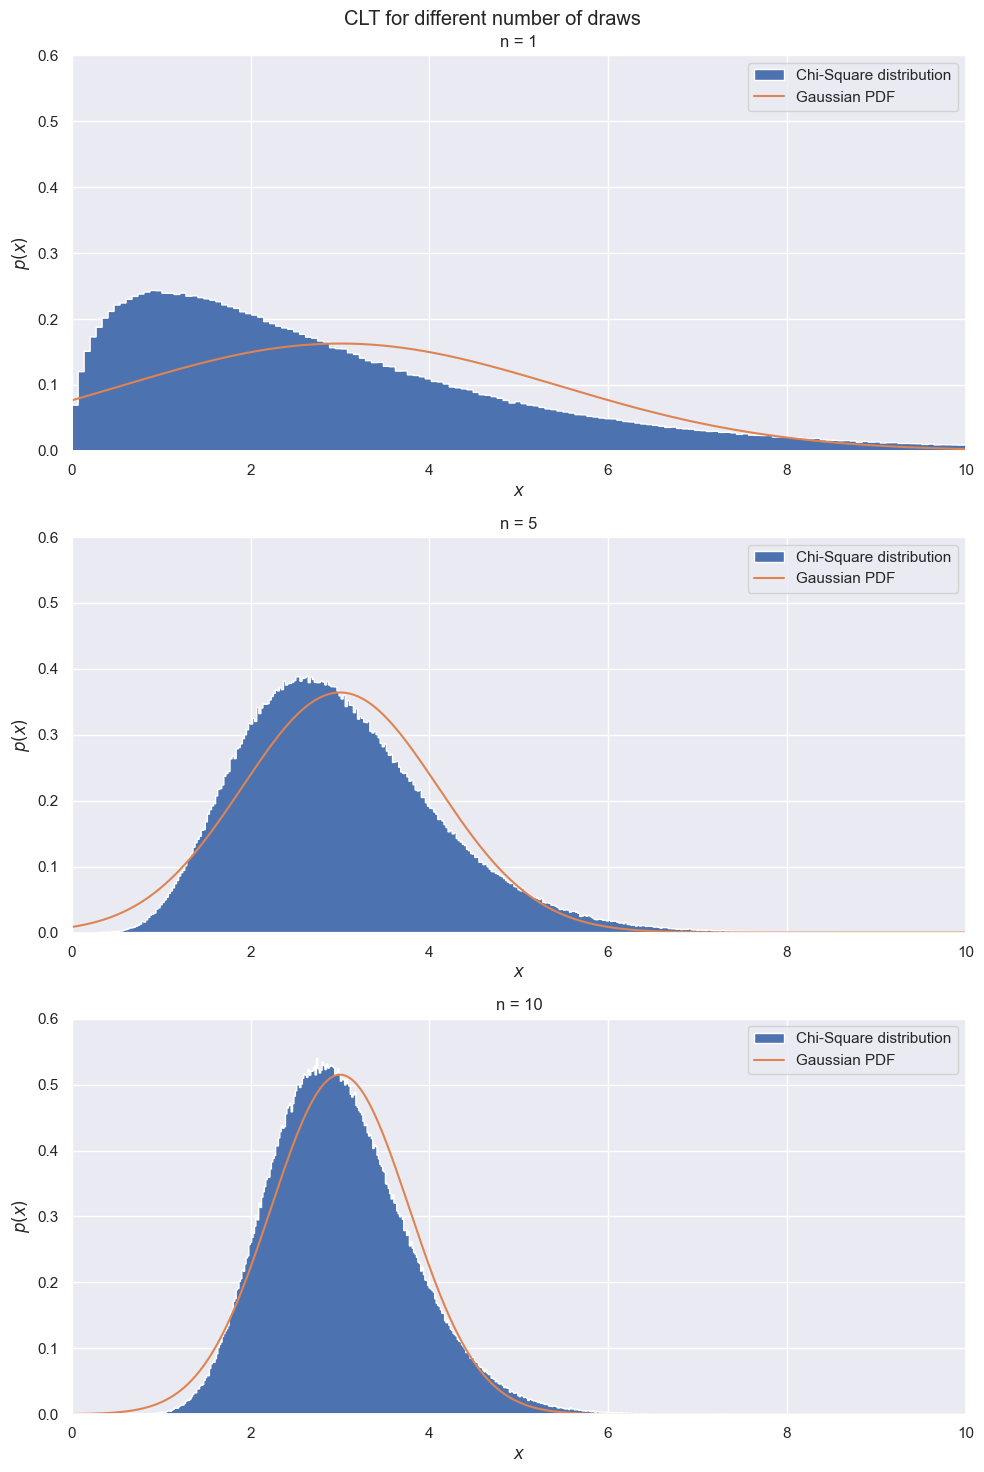

In [340]:
draws = [1, 5, 10]
k = 3
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.05)

for i in range(len(draws)):

    ax = fig.add_subplot(3, 1, i+1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 0.6)
    
    x = np.random.chisquare(k,  (draws[i] , int(1e6)))
    x_i = x.mean(0)
    
    ax.hist(x_i, bins = 500, histtype='stepfilled', density=True, label = 'Chi-Square distribution')
    mu = x_i.mean()
    sigma = np.sqrt(2.0* k/draws[i])
    x_pdf = np.linspace(0, 10, 1000)
    pdf_dist = stats.norm(mu, sigma)
    
    ax.plot(x_pdf, pdf_dist.pdf(x_pdf),label='Gaussian PDF')
    
    ax.set_title('n = {}'.format(draws[i]))
    ax.legend(loc='upper right')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    
fig.suptitle('CLT for different number of draws')
plt.tight_layout()
plt.show()

## Q2

In [325]:
df = pd.read_csv('https://people.iith.ac.in/shantanud/test.dat', sep='\s+')

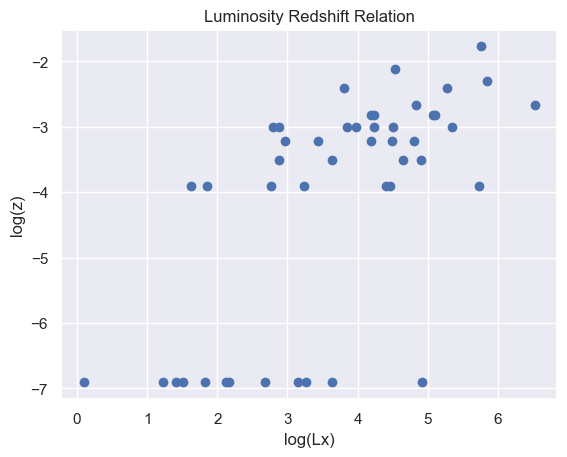

In [326]:
plt.plot(np.log(df['#Lx']), np.log(df['z']), marker='o', linestyle='none')
plt.title('Luminosity Redshift Relation')
plt.xlabel('log(Lx)')
plt.ylabel('log(z)')
plt.show()

The data seems moderately correlated. The data points are not uniformly distributed.

In [332]:
corr_coeff,p_value_1 = stats.pearsonr(df['#Lx'],df['z'])
rho,p_value_2 = stats.spearmanr(df['#Lx'],df['z'])
tau,p_value_3 = stats.kendalltau(df['#Lx'],df['z'])

In [335]:
print('Pearson correlation coefficient = ',corr_coeff, ', and P Value = ',p_value_1)
print('Spearman correlation coefficient = ',rho, ', and P Value = ',p_value_2)
print('Kendall correlation coefficient = ',tau, ', and P Value = ',p_value_3)


Pearson correlation coefficient =  0.5144497852670243 , and P Value =  0.00025464716576124137
Spearman correlation coefficient =  0.6596325957535455 , and P Value =  6.166489759080966e-07
Kendall correlation coefficient =  0.5029584682704178 , and P Value =  2.9696862274734036e-06


## Q3

In [341]:
wind_data = [[0,2.75],[1,7.80],[2,11.64],[3,13.79],[4,14.20],[5,13.15],[6,11.14],[7,8.72],
[8,6.34],[9,4.30],[10,2.73],[11,1.62],[12,0.91],[13,0.48],[14,0.24],[15,0.11],[16,0.05],[17,0.02],[18,0.01],[19,0.0]]

In [211]:
weibull = stats.weibull_min(2,-1,6)
x = np.linspace(0,19,1000)

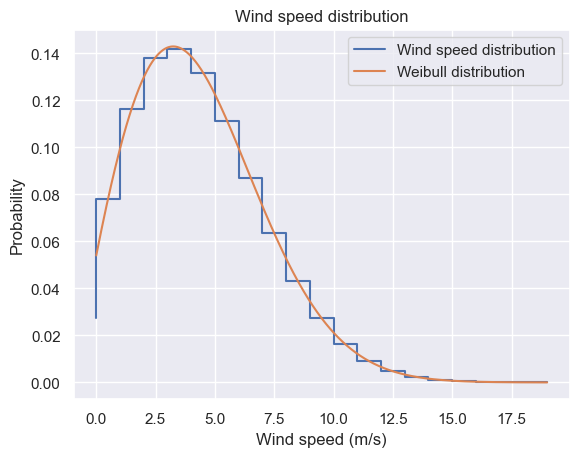

In [212]:
plt.step([i[0] for i in wind_data], [i[1]/100 for i in wind_data])
plt.plot(x,weibull.pdf(x))
plt.legend(['Wind speed distribution','Weibull distribution'])
plt.title('Wind speed distribution')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability')
plt.show()

## 4

In [342]:
gaussian_dist_1 = stats.norm.rvs(0,1,1000)
gaussian_dist_2 = stats.norm.rvs(0,1,1000)

pearson_coeff,p_value_1 = stats.pearsonr(gaussian_dist_1,gaussian_dist_2)

abs_val = abs(pearson_coeff)
t = -abs_val*np.sqrt((len(gaussian_dist_1)-2)/(1-(-abs_val)**2))
p_value_t = 2*stats.t.cdf(t,len(gaussian_dist_1)-2)


print('Pearson correlation coefficient = ',pearson_coeff, 'P Value = ',p_value_1)
print('Student t distribution P Value = ',p_value_t)


Pearson correlation coefficient =  -0.003686324567074191 P Value =  0.9073146014571943
Student t distribution P Value =  0.9073146014571989


We observe that the p value agrees with the p value obtained from the Pearson correlation coefficient.